#**SUMMARY**

Filename    : dataPreProcessing.ipynb   
Description : The file contains logic for Exloratory data analysis.

Below steps were performed for Pre-Processing, Data Visualization, EDA,   
      1.   Exploring the given Data files, classes and images of different
      classes.  
      2.   Dealing with missing values  
      3.   Visualization of different classes  
      4.   Analysis from the visualization of different classes.    
      5.   Split the train and validation dataframe.


**Revision History**  
Date        ||       Description               ||              Author  
31-05-2020   ||   Initial logic for data preprocessing   ||   Arvindh   
31-05-2020   ||   Review comment addressed - retrieved only the required metadata and stored result df in pickle file   ||   Arvindh     
07-06-2020   ||   Split the train and validation split     ||    Arvindh




#**Import Libraries**

In [0]:
%tensorflow_version 2.x

In [2]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [3]:
import pandas as pd 
import numpy as np
from seaborn import countplot
from matplotlib.pyplot import figure, show
import os

!pip install pydicom
import pydicom as dcm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 35.5MB 1.2MB/s 


#Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Set your project path 
project_path =  'drive/My Drive/Colab Notebooks/Capstone'
#Load the py file for common functions
#!python3 "/content/drive/My Drive/Colab Notebooks/common.py"

#List the files in the dataset

In [0]:
arr = os.listdir(project_path+'/dataset')
print(arr)

['GCP Credits Request Link - RSNA.txt', 'stage_2_detailed_class_info.csv', 'stage_2_sample_submission.csv', 'stage_2_train_labels.csv', 'stage_2_test_images', 'stage_2_train_images']


The dataset folder contains following,
1. stage_2_detailed_class_info.csv - containing class informations
2. stage_2_train_labels.csv - containing labels for training data
3. stage_2_sample_submission.csv - sample submission
4. stage_2_test_images - Test images
5. stage_2_train_images - Train images

#Load Data in a dataframe

Lets check the informations in the csv files by loading them in a dataframes 

In [0]:
class_info_df = pd.read_csv(project_path+'/dataset/stage_2_detailed_class_info.csv')
train_labels_df = pd.read_csv(project_path+'/dataset/stage_2_train_labels.csv') 
sample_sub_df = pd.read_csv(project_path+'/dataset/stage_2_sample_submission.csv') 

In [0]:
print(f"Class info csv - Rows: {class_info_df.shape[0]} , Columns: {class_info_df.shape[1]}")
print(f"Train labels csv - Rows: {train_labels_df.shape[0]} , Columns: {train_labels_df.shape[1]}")

Class info csv - Rows: 30227 , Columns: 2
Train labels csv - Rows: 30227 , Columns: 6


In [0]:
print(f"Sample submission csv - Rows: {sample_sub_df.shape[0]} , Columns: {sample_sub_df.shape[1]}")

Sample submission csv - Rows: 3000 , Columns: 2


In [0]:
class_info_df.head(5)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


**NOTE:** The Class info csv has 30227 rows and 2 columns, patientId and the [class].


In [0]:
train_labels_df.head(5)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


**NOTE:** The train labels csv has  30227 rows and 6 columns, patientId, x coordinate, y coordinate, width and height of the Pneumonia traces in the train images. 
Target column provides information about the Patient has Pneumonia or not.



In [0]:
sample_sub_df.head(5)

,patientId,PredictionString
0,0000a175-0e68-4ca4-b1af-167204a7e0bc,0.5 0 0 100 100
1,0005d3cc-3c3f-40b9-93c3-46231c3eb813,0.5 0 0 100 100
2,000686d7-f4fc-448d-97a0-44fa9c5d3aa6,0.5 0 0 100 100
3,000e3a7d-c0ca-4349-bb26-5af2d8993c3d,0.5 0 0 100 100
4,00100a24-854d-423d-a092-edcf6179e061,0.5 0 0 100 100


**NOTE** the sample submission csv has 3000 rows and 2 columns, patientId and PredictionString

#**Check for missing values**

In [0]:
class_info_df.isnull().sum()

patientId    0
class        0
dtype: int64

In [0]:
train_labels_df.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

There is no null values in the class_info_df.  
But the train_labels_df has null values in columns x, y, width, height.  
**The null values for the rows with 'Target' value is '0'**

#**Class distribution in dataframe**

In [0]:
class_info_df["class"].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

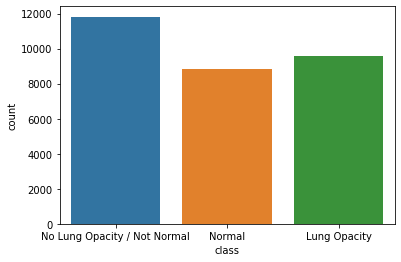

In [0]:
figure()
countplot(data=class_info_df,x="class")
show()

In [0]:
class_info_df["patientId"].value_counts()

32408669-c137-4e8d-bd62-fe8345b40e73    4
349f10b4-dc3e-4f3f-b2e4-a5b81448ce87    4
0ab261f9-4eb5-42ab-a9a5-e918904d6356    4
1c44e0a4-4612-438f-9a83-8d5bf919cb67    4
3239951b-6211-4290-b237-3d9ad17176db    4
                                       ..
53e8aa35-3d06-44c2-a755-6f4c6b4d976e    1
05c8ec6f-c41d-4dbe-a6a0-2875334b0b9e    1
e038b10a-bc01-4fc1-8aa0-97272a9c0490    1
58e9d328-783c-4c74-ba99-ffd9f7187353    1
95fe7234-02a4-4757-92bb-c6faf3f25f5f    1
Name: patientId, Length: 26684, dtype: int64

In [0]:
train_labels_df["Target"].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

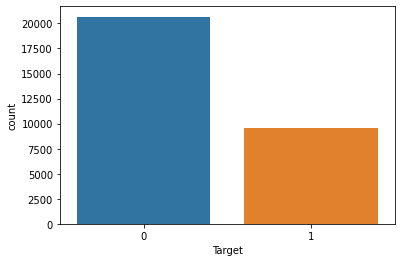

In [0]:
figure()
countplot(data=train_labels_df,x="Target")
show()

In [0]:
train_labels_df["patientId"].value_counts()

32408669-c137-4e8d-bd62-fe8345b40e73    4
349f10b4-dc3e-4f3f-b2e4-a5b81448ce87    4
0ab261f9-4eb5-42ab-a9a5-e918904d6356    4
1c44e0a4-4612-438f-9a83-8d5bf919cb67    4
3239951b-6211-4290-b237-3d9ad17176db    4
                                       ..
53e8aa35-3d06-44c2-a755-6f4c6b4d976e    1
05c8ec6f-c41d-4dbe-a6a0-2875334b0b9e    1
e038b10a-bc01-4fc1-8aa0-97272a9c0490    1
58e9d328-783c-4c74-ba99-ffd9f7187353    1
95fe7234-02a4-4757-92bb-c6faf3f25f5f    1
Name: patientId, Length: 26684, dtype: int64

**NOTE:** The value count of 'Target' column in the dataset is '0' - 20672 rows & '1' - 9555 rows, which denotes that the dataset is not equally balanced. 
Also a single patientId in the dataset is having one or more than one rows, which denotes that the multiple traces of Pneumonia.

#**Merge the 'class_info_df' and 'train_labels_df'**

In [0]:
train_class_df = train_labels_df.merge(class_info_df, left_on='patientId', right_on='patientId', how='inner')
train_class_df.shape

(37629, 7)

In [0]:
# The merge function resulted in duplicate values. So droping duplicate rows.
train_class_df = train_class_df.drop_duplicates()
train_class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 37627
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [0]:
train_class_df.head(5)

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [0]:
#check for any duplicate rows for a patientId
train_class_df[train_class_df['patientId']=='32408669-c137-4e8d-bd62-fe8345b40e73']

,patientId,x,y,width,height,Target,class
3433,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
3437,32408669-c137-4e8d-bd62-fe8345b40e73,702.0,801.0,249.0,144.0,1,Lung Opacity
3441,32408669-c137-4e8d-bd62-fe8345b40e73,300.0,367.0,226.0,423.0,1,Lung Opacity
3445,32408669-c137-4e8d-bd62-fe8345b40e73,706.0,360.0,232.0,238.0,1,Lung Opacity


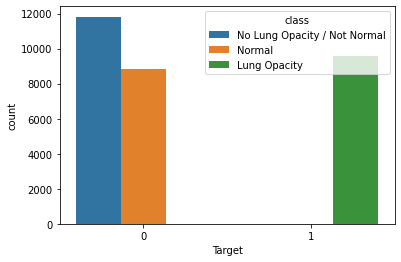

In [0]:
figure()
countplot(data=train_class_df,x="Target", hue="class")
show()

#**Note:**
Target = 1 refers to Patients with class 'Lung Opacity'.

Target = 0 refers to Patients with class 'Normal' and 'No Lung Opacity / Not Normal'.

# **Exploring Train & Test Images**

In [0]:
image_train_path = os.listdir(project_path+'/dataset/stage_2_train_images')
image_test_path = os.listdir(project_path+'/dataset/stage_2_test_images')
print("Number of images in train set:", len(image_train_path),"\nNumber of images in test set:", len(image_test_path))

Number of images in train set: 26704 
Number of images in test set: 3000


In [0]:
print("Unique Patient Id from train_class_df: ", train_class_df['patientId'].nunique())

Unique Patient Id from train_class_df:  26684


The number of unique PatientId in the train_class_df is approximately equal to the number of images in the train set. 

#**Metadata information in the DICOM images**

In [0]:
samplePatientID = train_class_df["patientId"][0]
samplePatientID = samplePatientID+'.dcm'
dicom_file_path = os.path.join(project_path+"/dataset/stage_2_train_images/",samplePatientID)
dicom_file_dataset = dcm.read_file(dicom_file_path)
dicom_file_dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

**NOTE: ** The metadata information in the DICOM images has some important informations, such as Patient sex, Patient age, View position etc.
Not sure on other features/informations in the metadata, lets analyse by adding those features to the existing dataframe.

#Print sample image from the train set for each 'Class' values

Note: display_images(data) is the method from common.py to read and print the dicom images

In [0]:
#!python3 "/content/drive/My Drive/Colab Notebooks/common.py"
import common as com

In [0]:
def display_images(data):
	    img_data = list(data.T.to_dict().values())
	    #img_data = list(data)
	    f, ax = plt.subplots(1,3, figsize=(16,18))
	    for i,data_row in enumerate(img_data):
              imageName = data_row['patientId']+'.dcm'
              imagePath = os.path.join(project_path+"/dataset/stage_2_train_images/",imageName)
              data_row_img = dcm.dcmread(imagePath)
              ax[i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
              ax[i%3].axis('off')
              ax[i%3].set_title('ID: {}\nClass: {}'.format(
                  data_row['patientId'], data_row['class']))
	    plt.show()
	    
def display_images_with_boxes(data):
	    img_data = list(data.T.to_dict().values())
	    f, ax = plt.subplots(1,3, figsize=(16,18))
	    for i,data_row in enumerate(img_data):
              imageName = data_row['patientId']+'.dcm'
              imagePath = os.path.join(project_path+"/dataset/stage_2_train_images/",imageName)
              data_row_img = dcm.dcmread(imagePath)
              ax[i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
              ax[i%3].axis('off')
              ax[i%3].set_title('ID: {}\nClass: {}'.format(
                  data_row['patientId'], data_row['class']))
              rows = train_class_df[train_class_df['patientId']==data_row['patientId']]
              box_data = list(rows.T.to_dict().values())
              for j, row in enumerate(box_data):
                  ax[i%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                      width=row['width'],height=row['height'], 
                      linewidth=1,edgecolor='r',facecolor='none'))   
	    plt.show()
   
def collect_metadata(data, location):
	    dcm_columns = None

	    for n, pid in enumerate(data['patientId'].unique()):
              imageName = pid+'.dcm'
              imagePath = os.path.join(project_path + location, imageName)
              dcm_data = dcm.read_file(imagePath)
              """ 
              if not dcm_columns:
                  dcm_columns = dcm_data.dir()

              for col in dcm_columns:
                  if col in ["PatientAge", "PatientSex", "ViewPosition"]:
                        value = dcm_data.data_element(col).value
                        index = data[data['patientId'] == pid].index
                        data.loc[index, col] = value
                """ 
              index = data[data['patientId'] == pid].index
              data.loc[index, "PatientAge"] = dcm_data.data_element("PatientAge").value
              data.loc[index, "PatientSex"] = dcm_data.data_element("PatientSex").value
              data.loc[index, "ViewPosition"] = dcm_data.data_element("ViewPosition").value
              del dcm_data

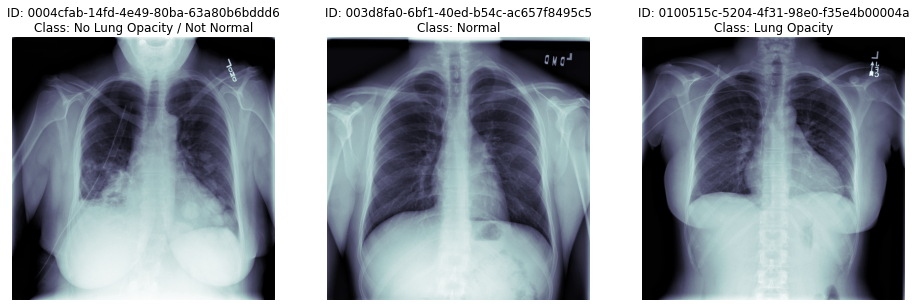

In [0]:
unq3_patient_id = ['0004cfab-14fd-4e49-80ba-63a80b6bddd6','003d8fa0-6bf1-40ed-b54c-ac657f8495c5','0100515c-5204-4f31-98e0-f35e4b00004a']
sample_df = train_class_df[train_class_df.patientId.isin(unq3_patient_id)]
display_images(sample_df)

#Print sample image from the train set for 'Lung Opacity' class with the boxes

Note: display_images_with_boxes(data) is the method from common.py to read and print the dicom images with the boxes denoting the pneumonia traces.

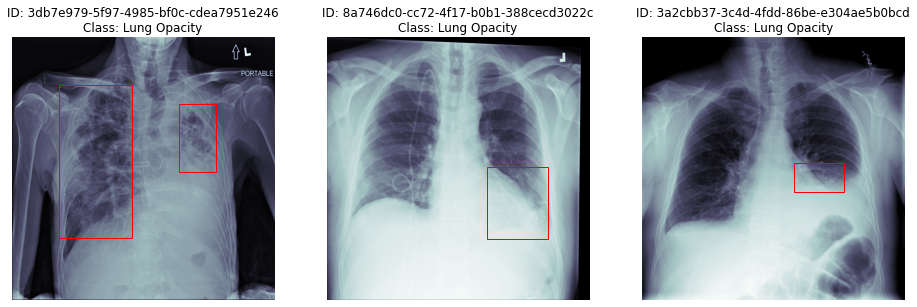

In [0]:
sample_tar_df = train_class_df[train_class_df['Target']==1].sample(3)
display_images_with_boxes(sample_tar_df)

#**Add metadata informations to the dataframe** 

Note: collect_metadata(data, location) is the method in common.py to read and add the metadata information from the dicom images to dataframe.

In [0]:
collect_metadata(train_class_df, "/dataset/stage_2_train_images/")
train_class_df.head(5)

,patientId,x,y,width,height,Target,class,PatientAge,PatientSex,ViewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,51,F,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,48,F,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,19,M,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,28,M,PA
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,32,F,AP


In [0]:
train_class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 37627
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patientId     30227 non-null  object 
 1   x             9555 non-null   float64
 2   y             9555 non-null   float64
 3   width         9555 non-null   float64
 4   height        9555 non-null   float64
 5   Target        30227 non-null  int64  
 6   class         30227 non-null  object 
 7   PatientAge    30227 non-null  object 
 8   PatientSex    30227 non-null  object 
 9   ViewPosition  30227 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.8+ MB


#**Load the result dataframe in pickle file**

**NOTE:** This pickle file can be used to analyse the data 
and split dataframe for train and test

In [0]:
file_Name = "train_class_df_pickle"
# open the file for writing
fileObject = open(file_Name,'wb') 

# this writes the object train_class_df to the
# file named 'train_class_df_pickle'
pickle.dump(train_class_df, fileObject)   

# here we close the fileObject
fileObject.close()

#**Read the pickle file and load into dataframe**

In [6]:
file_Name = "/train_class_df_pickle"
# we open the file for reading
fileObject = open(project_path+file_Name,'rb')  
# load the object from the file into temp var b
train_class_df_pick = pickle.load(fileObject)  
train_class_df_pick.head(5)

,patientId,x,y,width,height,Target,class,PatientAge,PatientSex,ViewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,51,F,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,48,F,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,19,M,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,28,M,PA
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,32,F,AP


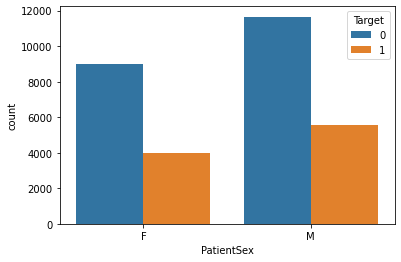

In [7]:
countplot(data = train_class_df_pick, x = 'PatientSex', hue = 'Target');

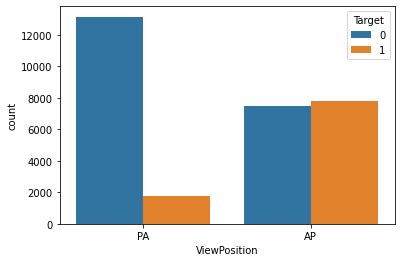

In [8]:
countplot(data = train_class_df_pick, x = 'ViewPosition', hue = 'Target');

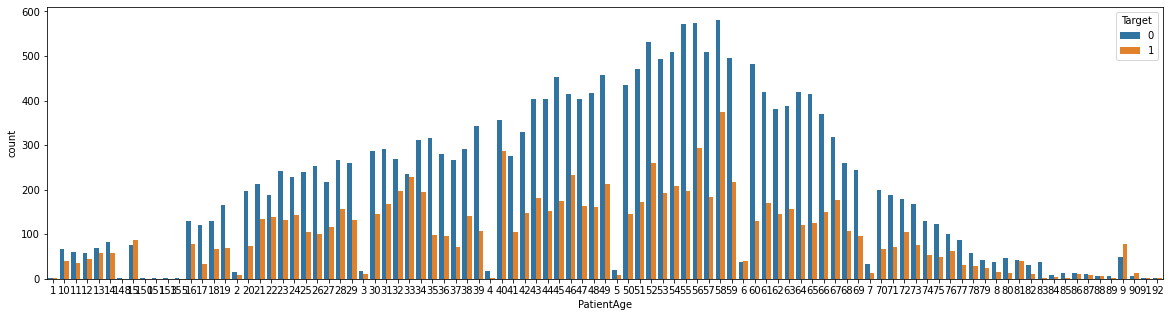

In [9]:
figure(figsize = (20, 5))
countplot(data = train_class_df_pick, x = 'PatientAge', hue = 'Target');

0    20672
1     9555
Name: Target, dtype: int64

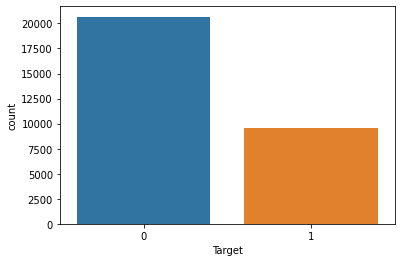

In [11]:
countplot(data=train_class_df_pick,x="Target")
train_class_df_pick["Target"].value_counts()

#**Train & Test Split**

In [12]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(train_class_df_pick, test_size=0.20,
                                    stratify=train_class_df_pick['Target'])
print(train_df.shape, 'training data')
print(valid_df.shape, 'validation data')

(24181, 10) training data
(6046, 10) validation data


Note: The final dataframe  with 30227 rows from the EDA has been used for spliting the train and test dataframes in the ratio of 80:20 based on the property 'Target'.

**Training dataframe has 24181 rows of data.**   
**Validation dataframe has 6046 rows of data.**

# Lets check the distribution of 'Target' property in both train and validation dataframes.

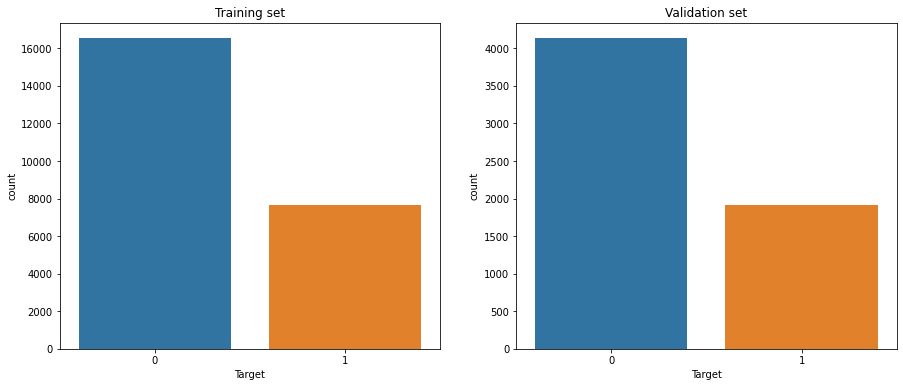

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
ax1.set_title("Training set")
ax2.set_title("Validation set")
countplot(data=train_df,x="Target", ax= ax1)
countplot(data=valid_df,x="Target", ax= ax2)
show()

In [15]:
print("The value count of Target column in train dataset...")
train_df["Target"].value_counts()


The value count of Target column in train dataset...


0    16537
1     7644
Name: Target, dtype: int64

In [16]:
print("The value count of Target column in validation dataset...")
valid_df["Target"].value_counts()

The value count of Target column in validation dataset...


0    4135
1    1911
Name: Target, dtype: int64

#**Create Pickle files for Train & Validation datasets**

In [0]:
train_df_pick = "train_df_pickle"
valid_df_pick = "valid_df_pickle"

# open the file for writing
fileObject = open(train_df_pick,'wb') 
fileObject1 = open(valid_df_pick,'wb') 

pickle.dump(train_df, fileObject) 
pickle.dump(valid_df, fileObject1)   

# here we close the fileObjects
fileObject.close()
fileObject1.close()

#**Note**:
From EDA performed in the given dataset and dicom images, the features are now added to the dataframe which can be used for building a model to detect pneumonia. 